In [ ]:
#Team ID PNT2022TMID14240
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msn

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/chronic_kidney_disease.csv')

In [ ]:
data.shape

(400, 26)

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
data.describe(include="all")

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
data.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


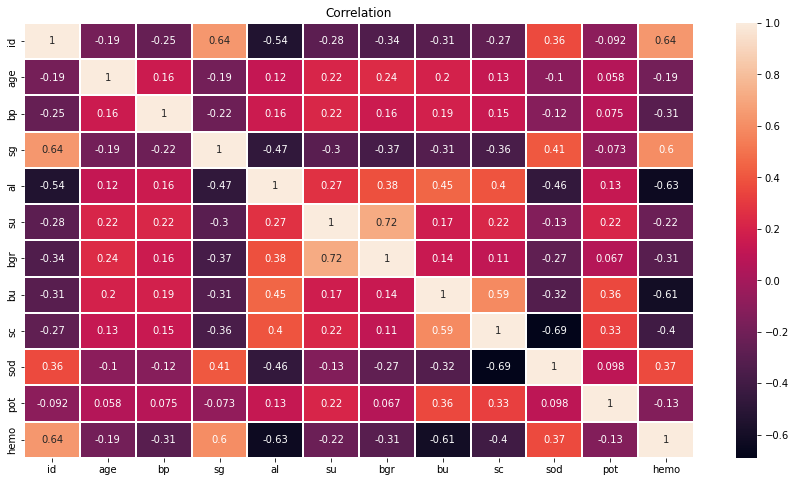

In [ ]:
plt.figure(figsize=(15,8));
plt.title("Correlation",color="black")
sns.heatmap(data.corr(),linewidth=1,annot=True);

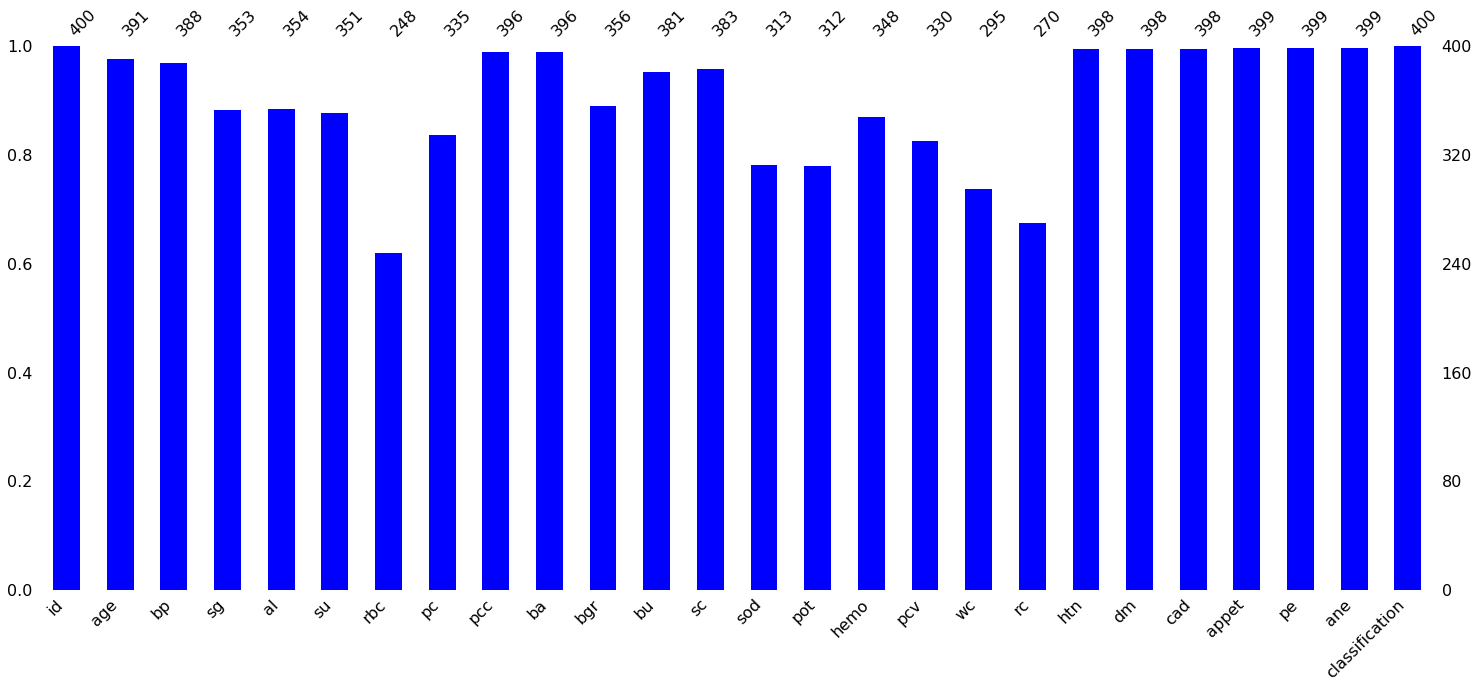

In [ ]:
import missingno as msn
msn.bar(data,color="blue");

In [ ]:
data.isnull()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.duplicated().value_counts()

False    400
dtype: int64

In [ ]:
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data[data["classification"]=="ckd\t"]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
230,230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,...,NaN,9500,NaN,yes,yes,no,poor,no,no,ckd\t


In [ ]:
data["classification"]=data["classification"].replace("ckd\t","ckd",regex=True)

In [ ]:
data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

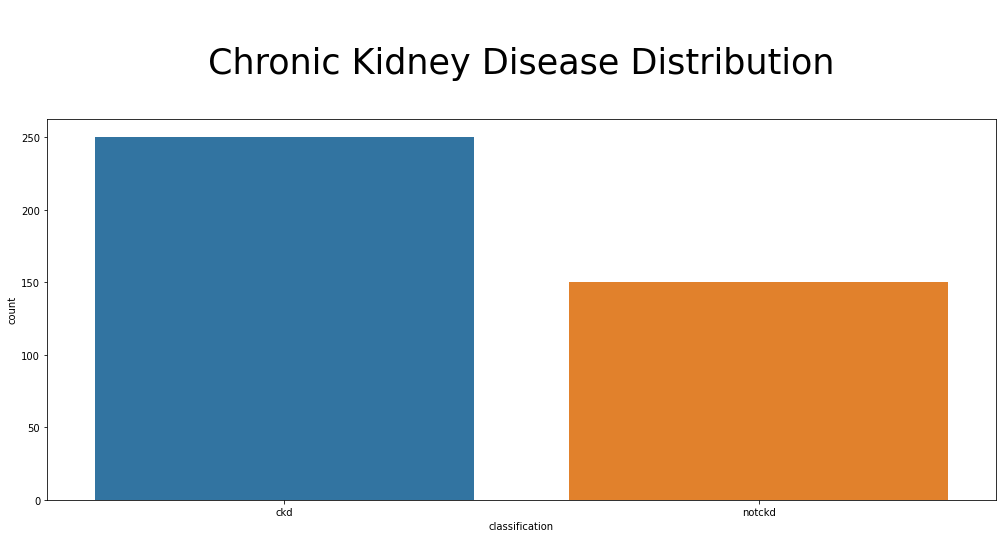

In [ ]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="classification")
plt.title("\nChronic Kidney Disease Distribution\n", fontsize=35)
plt.show();

In [ ]:
data["age"].isnull().sum()

9

In [ ]:
data["age"]=data["age"].fillna(df["age"].mean())

In [ ]:
data["age"].isnull().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
#all float values are filled with median and mode
numerical=[]
for col in data.columns:
    if data[col].dtype=="float64":
        numerical.append(col)
print(numerical)
for col in data.columns:
    if col in numerical:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_col = [col for col in data.columns if data[col].dtype == 'object']
for col in object_col:
    data[col] = le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

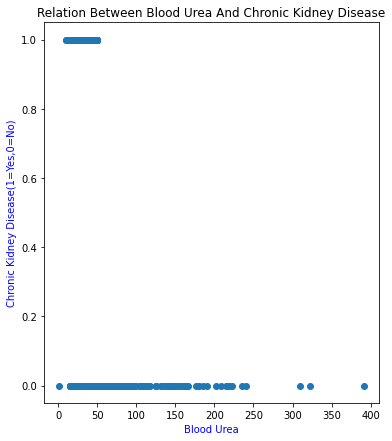

In [ ]:
#when blood urea is above 40 CKD occurs
fig, ax = plt.subplots(figsize=(6,7))
M=data[['bu']]
N=data[['classification']]
plt.title("Relation Between Blood Urea And Chronic Kidney Disease",color="black");
plt.xlabel("Blood Urea",color="blue")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)",color="blue")
ax.scatter(M,N);
plt.show();

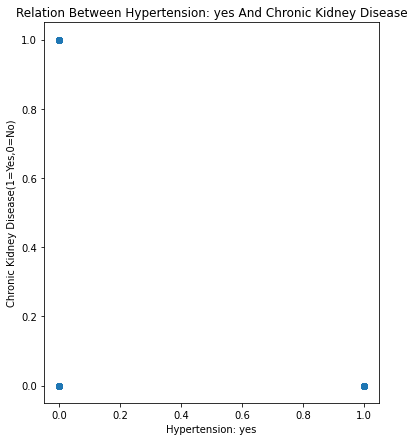

In [ ]:
#hypertension also causes kidney failure
fig, ax = plt.subplots(figsize=(6,7))
M=data[['htn']]
N=data[['classification']]
plt.title("Relation Between Hypertension: yes And Chronic Kidney Disease");
plt.xlabel("Hypertension: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

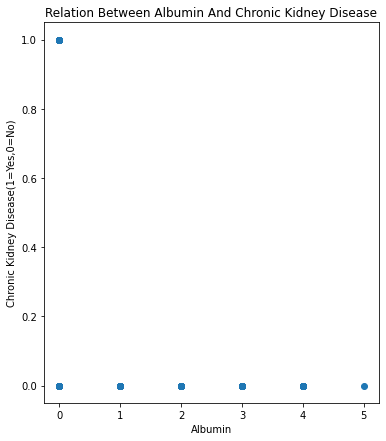

In [ ]:
#blood albumin level
fig, ax = plt.subplots(figsize=(6,7))
M=data[['al']]
N=data[['classification']]
plt.title("Relation Between Albumin And Chronic Kidney Disease");
plt.xlabel("Albumin")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

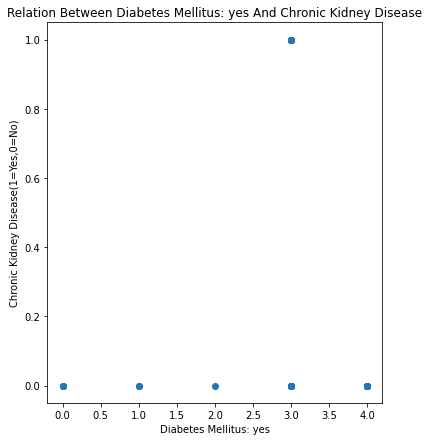

In [ ]:
#diabetes
fig, ax = plt.subplots(figsize=(6,7))
M=data[['dm']]
N=data[['classification']]
plt.title("Relation Between Diabetes Mellitus: yes And Chronic Kidney Disease",color="black");
plt.xlabel("Diabetes Mellitus: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

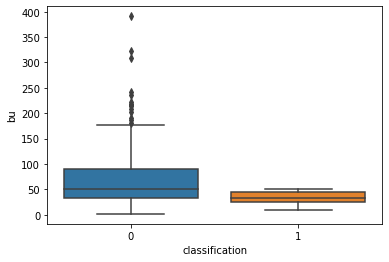

In [ ]:
sns.boxplot(x=data['classification'], y=data['bu'])
plt.show();

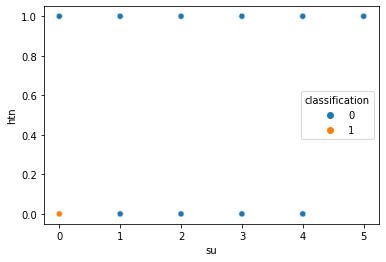

In [ ]:
sns.scatterplot(data=data,x="su",y="htn",hue='classification');

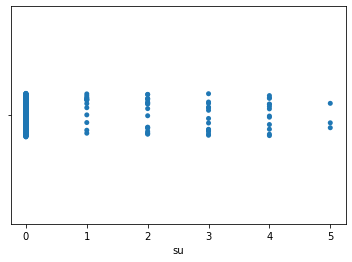

In [ ]:
sns.stripplot(x=data["su"]);

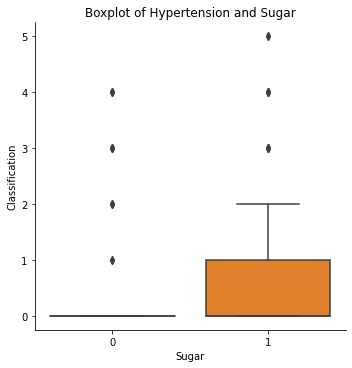

In [ ]:
sns.catplot(x="htn",y="su",data=data,kind="box");
plt.xlabel("Sugar",color="black")
plt.ylabel("Classification",color="black")
plt.title("Boxplot of Hypertension and Sugar",color="black");

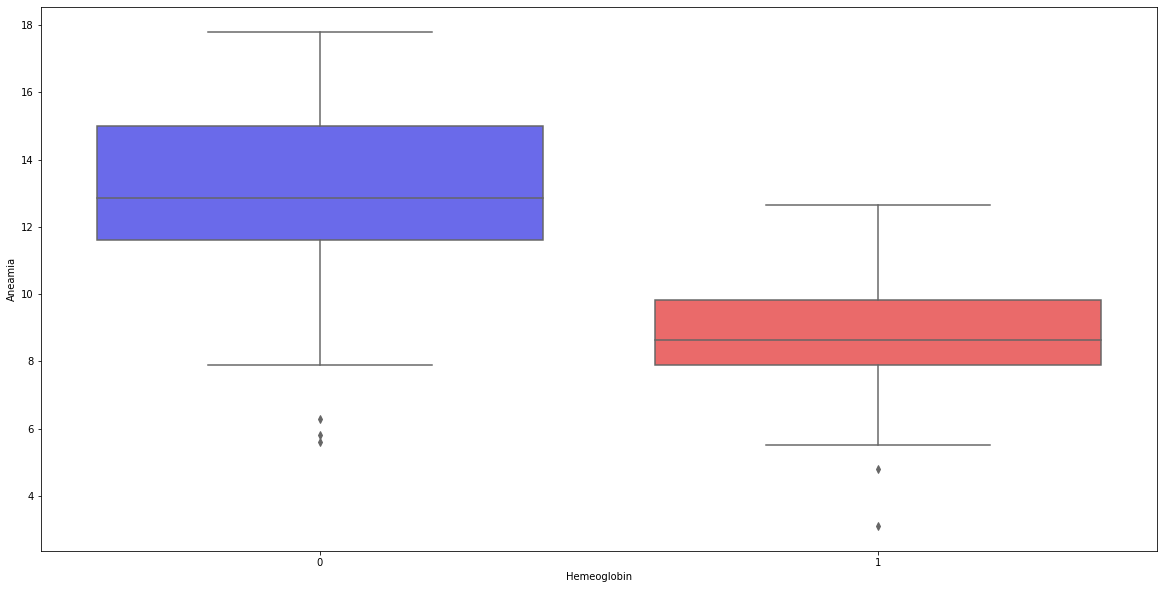

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="ane", y="hemo", palette='seismic')
plt.xlabel("Hemeoglobin",color="black")
plt.ylabel("Aneamia",color="black")
plt.show()

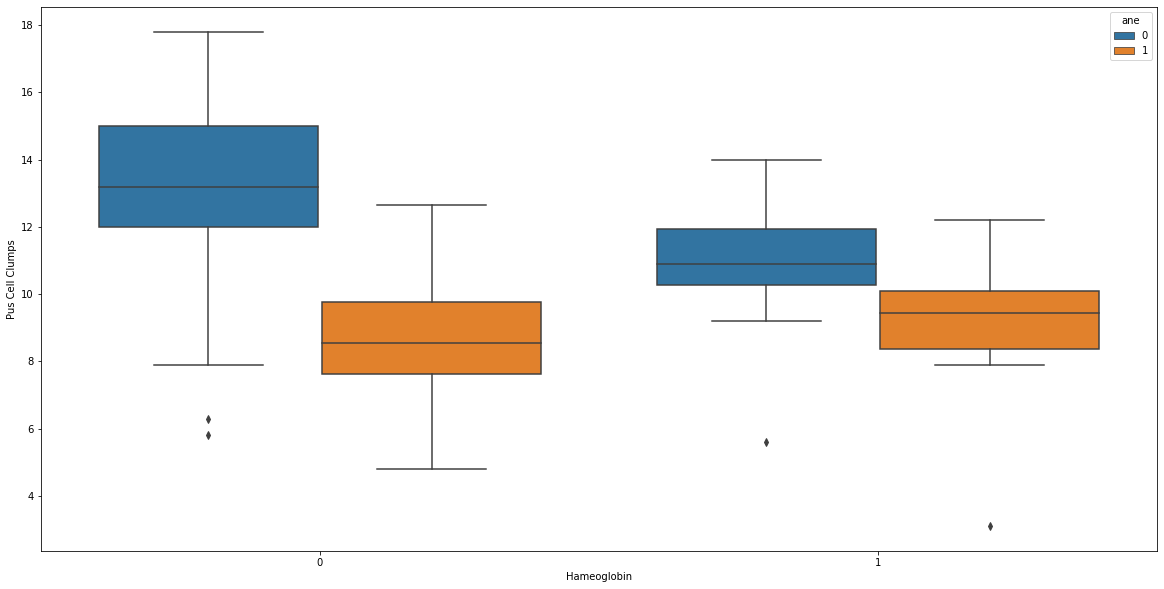

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, y='hemo', x="pcc", hue="ane")
plt.xlabel("Hameoglobin",color="black")
plt.ylabel("Pus Cell Clumps",color="black")
plt.show()

In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data['classification'].shape

(400,)

In [ ]:
data.groupby("classification").mean()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
classification,,,,,,,,,,,,,,,,,,,,,
0,124.5,54.443468,79.640000,1.014940,1.44,0.632,0.812,0.696,0.168,0.088,...,11.016000,23.048000,65.924,26.688,0.588,3.48,1.128,0.328,0.304,0.24
1,324.5,46.549889,71.466667,1.022333,0.00,0.000,1.000,1.000,0.000,0.000,...,15.086667,34.193333,60.540,35.420,0.000,3.00,1.000,0.000,0.000,0.00


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
#dependent and independent variable
X=data[[ 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']]
y=data[['classification']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=222)

In [ ]:
print("Training Data :")
print("The shape of X training data is :" ,X_train.shape)
print("The shape of y training data is :" ,y_train.shape)

Training Data :
The shape of X training data is : (300, 24)
The shape of y training data is : (300, 1)


In [ ]:
print("Testing Data :")
print("The shape of X testing data is :" ,X_test.shape)
print("The shape of y testing data is :" ,y_test.shape)

Testing Data :
The shape of X testing data is : (100, 24)
The shape of y testing data is : (100, 1)


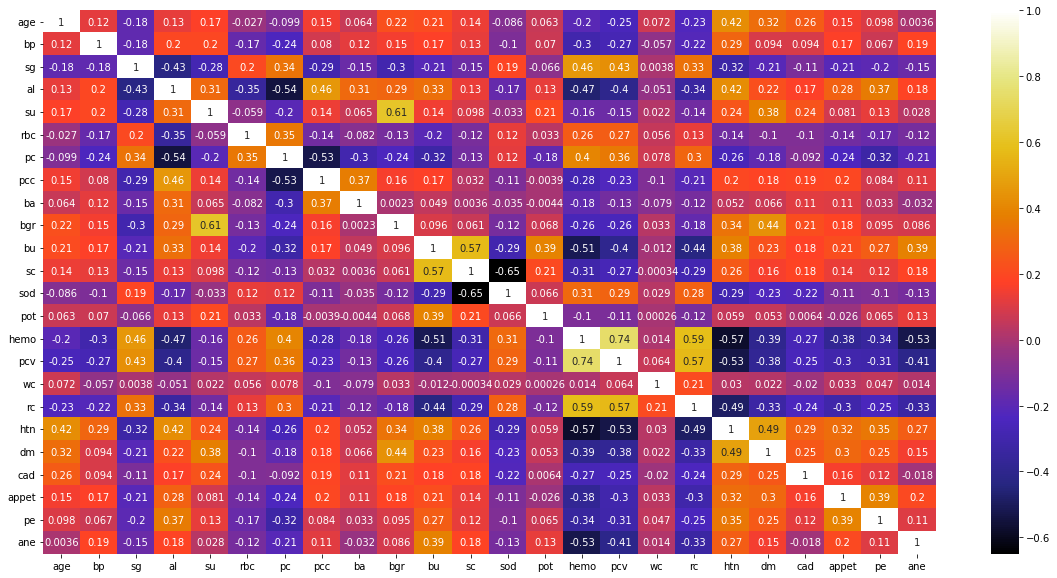

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap)
plt.show();

In [ ]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

0

In [ ]:
#"Packed Cell Volume" and "Red Blood Cells (millions/cmm)" are the correlated features so we need to remove them. So,X needs to redefined again.
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.30,26,56,34,0,3,1,0,0,0
201,64.0,70.0,1.020,0.0,0.0,1,1,0,0,113.0,...,7.90,9,90,34,1,4,2,0,1,1
194,80.0,70.0,1.010,2.0,0.0,1,0,0,0,121.0,...,12.65,29,90,34,1,1,1,0,0,0
184,54.0,60.0,1.015,3.0,2.0,1,0,0,0,352.0,...,11.30,19,54,16,1,4,2,1,1,0
125,72.0,90.0,1.020,0.0,0.0,1,1,0,0,308.0,...,12.65,29,90,34,1,4,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,41.0,70.0,1.020,0.0,0.0,1,1,0,0,125.0,...,16.80,29,58,41,0,3,1,0,0,0
272,56.0,80.0,1.025,0.0,0.0,1,1,0,0,139.0,...,14.80,30,52,37,0,3,1,0,0,0
370,69.0,70.0,1.020,0.0,0.0,1,1,0,0,83.0,...,16.20,38,85,36,0,3,1,0,0,0
374,79.0,80.0,1.025,0.0,0.0,1,1,0,0,111.0,...,16.30,28,74,46,0,3,1,0,0,0


In [ ]:
X=data[['age', 'bp', 'sg', 'al', 'su',  'pcc', 'ba', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane']]

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X=s.fit_transform(X)

In [ ]:
X.shape

(400, 22)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=222)

In [ ]:
print("Training Data :")
print("The shape of X training data is :" ,X_train.shape)
print("The shape of y training data is :" ,y_train.shape)

print("Testing Data :")
print("The shape of X testing data is :" ,X_test.shape)
print("The shape of y testing data is :" ,y_test.shape)

Training Data :
The shape of X training data is : (300, 22)
The shape of y training data is : (300, 1)
Testing Data :
The shape of X testing data is : (100, 22)
The shape of y testing data is : (100, 1)


In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200,random_state=222)
model

LogisticRegression(max_iter=200, random_state=222)

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=222)

In [ ]:
# PREDICTION
y_predic=model.predict(X_test)
print(y_predic)

[0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1]


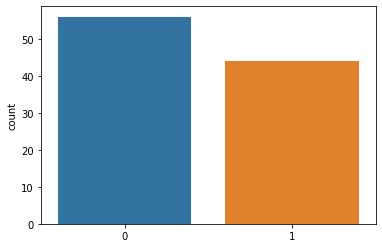

In [ ]:
sns.countplot(y_predic);

In [ ]:
#probability
model.predict_proba(X_test)

array([[9.69469103e-01, 3.05308966e-02],
       [9.99997135e-01, 2.86474453e-06],
       [9.99497428e-01, 5.02571581e-04],
       [9.99999998e-01, 2.01221842e-09],
       [9.99586081e-01, 4.13919404e-04],
       [9.55058469e-01, 4.49415309e-02],
       [9.99995077e-01, 4.92267473e-06],
       [9.99999667e-01, 3.32812179e-07],
       [9.99999000e-01, 9.99557242e-07],
       [1.47823168e-02, 9.85217683e-01],
       [1.00000000e+00, 1.14617074e-11],
       [5.60367979e-04, 9.99439632e-01],
       [2.23221115e-02, 9.77677889e-01],
       [1.87771483e-02, 9.81222852e-01],
       [9.96520517e-01, 3.47948265e-03],
       [9.97346374e-01, 2.65362624e-03],
       [1.42132510e-03, 9.98578675e-01],
       [9.99395271e-01, 6.04728566e-04],
       [9.99848667e-01, 1.51332661e-04],
       [3.35504504e-02, 9.66449550e-01],
       [1.04071384e-01, 8.95928616e-01],
       [9.96976832e-01, 3.02316824e-03],
       [9.99997747e-01, 2.25253521e-06],
       [6.65983057e-03, 9.93340169e-01],
       [9.999999

In [ ]:
#MODEL EVALUATION
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("Accuracy of the model is :  %3f " % accuracy_score(y_test,y_predic))

Accuracy of the model is :  0.990000 


In [ ]:
print(confusion_matrix(y_test,y_predic))

[[56  1]
 [ 0 43]]


In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.98      1.00      0.99        43

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

